In [1]:
#Importing libraries
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
import matplotlib.pyplot as plt
import itertools
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
#reading the data
df=pd.read_excel("Downloads\Sample - Superstore.xls",parse_dates=["Order Date"],index_col="Order Date")

In [3]:
df.head()

,Row ID,Order ID,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
Order Date,,,,,,,,,,,,,,,,,,,,
2016-11-08,1,CA-2016-152156,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
2016-11-08,2,CA-2016-152156,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2016-06-12,3,CA-2016-138688,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
2015-10-11,4,US-2015-108966,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
2015-10-11,5,US-2015-108966,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [4]:
df["Category"].unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

In [5]:
# Working with Technology data
new_df=df[df.Category=="Office Supplies"]

In [6]:
new_df.head()

,Row ID,Order ID,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
Order Date,,,,,,,,,,,,,,,,,,,,
2016-06-12,3,CA-2016-138688,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.620,2,0.0,6.8714
2015-10-11,5,US-2015-108966,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.368,2,0.2,2.5164
2014-06-09,7,CA-2014-115812,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,West,OFF-AR-10002833,Office Supplies,Art,Newell 322,7.280,4,0.0,1.9656
2014-06-09,9,CA-2014-115812,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,West,OFF-BI-10003910,Office Supplies,Binders,DXL Angle-View Binders with Locking Rings by S...,18.504,3,0.2,5.7825
2014-06-09,10,CA-2014-115812,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,West,OFF-AP-10002892,Office Supplies,Appliances,Belkin F5C206VTEL 6 Outlet Surge,114.900,5,0.0,34.4700


In [7]:
#dropping unnecessary columns
cols = ['Row ID', 'Order ID', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Quantity', 'Discount', 'Profit']
new_df.drop(cols, axis=1, inplace=True)
new_df = new_df.sort_index()

In [8]:
new_df.head()

,Sales
Order Date,
2014-01-03,16.448
2014-01-04,272.736
2014-01-04,11.784
2014-01-04,3.540
2014-01-05,19.536


In [9]:
new_df.isnull().sum() #checking null values

Sales    0
dtype: int64

In [10]:
new_df=new_df.groupby(new_df.index).sum()

In [11]:
# Getting the sales data for average daily sales for every month
new_df = new_df['Sales'].resample('M').mean()

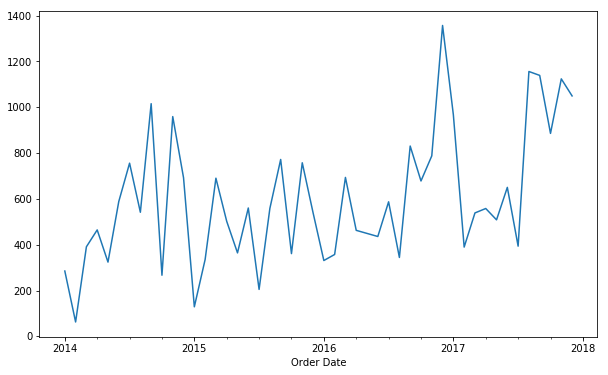

In [12]:
new_df.plot(figsize=(10,6))
plt.show()

# Dickey-Fuller Test

### We need to check if the timeseries is stationary before applying ARIMA models

In [13]:
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = pd.rolling_mean(timeseries, window=12)
    rolstd = pd.rolling_std(timeseries, window=12)

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

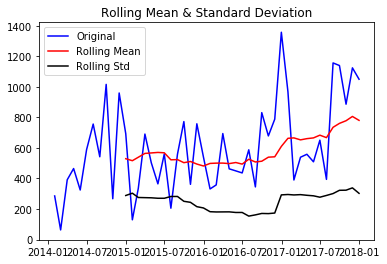

Results of Dickey-Fuller Test:
Test Statistic                 -4.664633
p-value                         0.000098
#Lags Used                      0.000000
Number of Observations Used    47.000000
Critical Value (1%)            -3.577848
Critical Value (5%)            -2.925338
Critical Value (10%)           -2.600774
dtype: float64


In [14]:
test_stationarity(new_df)

### As the Test Statistic is less than Critical values, we can reject the Null Hypothesis that "Time Series is not stationary", and we can apply ARIMA models to it. 

## ARIMA Model

### We need to find optimal values of p,d and q hence before building the model, we need to do Hyperparameter tuning

In [15]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(new_df,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:747.1990404227043
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1026.8823046027019
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:500.7335398750499
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:516.0876543936834
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1387.1991662640858
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:347.44488563489716
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:702.6891395292472
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:2850.045517318429
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:487.7601415814796
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:517.4952646586306
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:2679.7443587210428
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:345.69220944601255
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:666.4572045007284
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1456.9433437658722
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:503.0840747609876
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:500.0109385290892
ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:1480.3989131737278
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:335.71489594188165
AR

### Model Fitting

In [16]:
# Best values is with (ARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:318.20)

mod = sm.tsa.statespace.SARIMAX(new_df,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()

### Model Validation

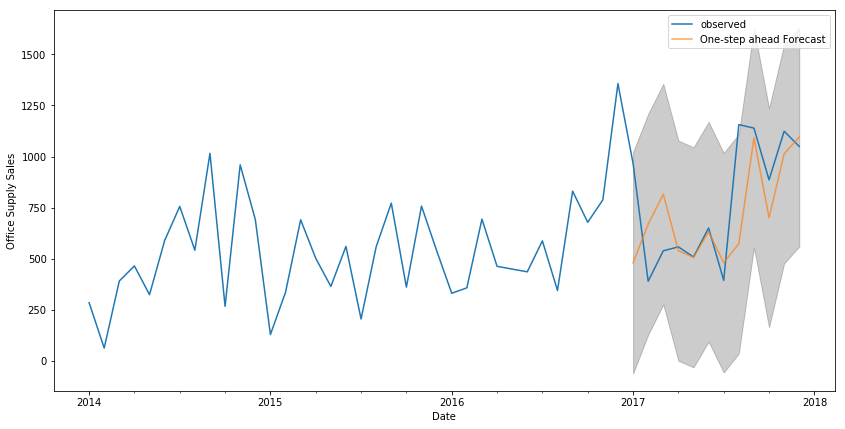

In [17]:
pred = results.get_prediction(start=pd.to_datetime('2017-01-31'), dynamic=False)
pred_ci = pred.conf_int()
ax = new_df['2014':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Office Supply Sales')
plt.legend()
plt.show()

### Checking the RMSE Value

In [18]:
forecasted = pred.predicted_mean
actual = new_df['2017-01-01':]
mse = ((forecasted - actual) ** 2).mean()
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 256.6


### Forecasting sales for next 2 years

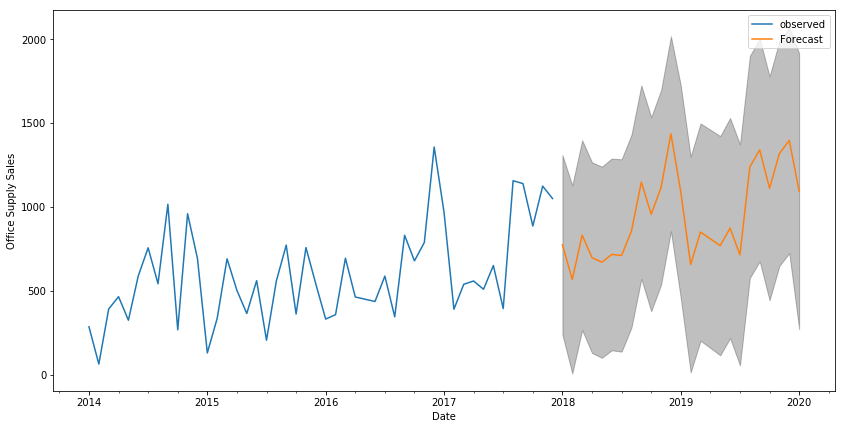

In [19]:
pred_uc = results.get_forecast(steps=25)
pred_ci = pred_uc.conf_int()
ax = new_df.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Office Supply Sales')
plt.legend()
plt.show()

### Trend Analysis

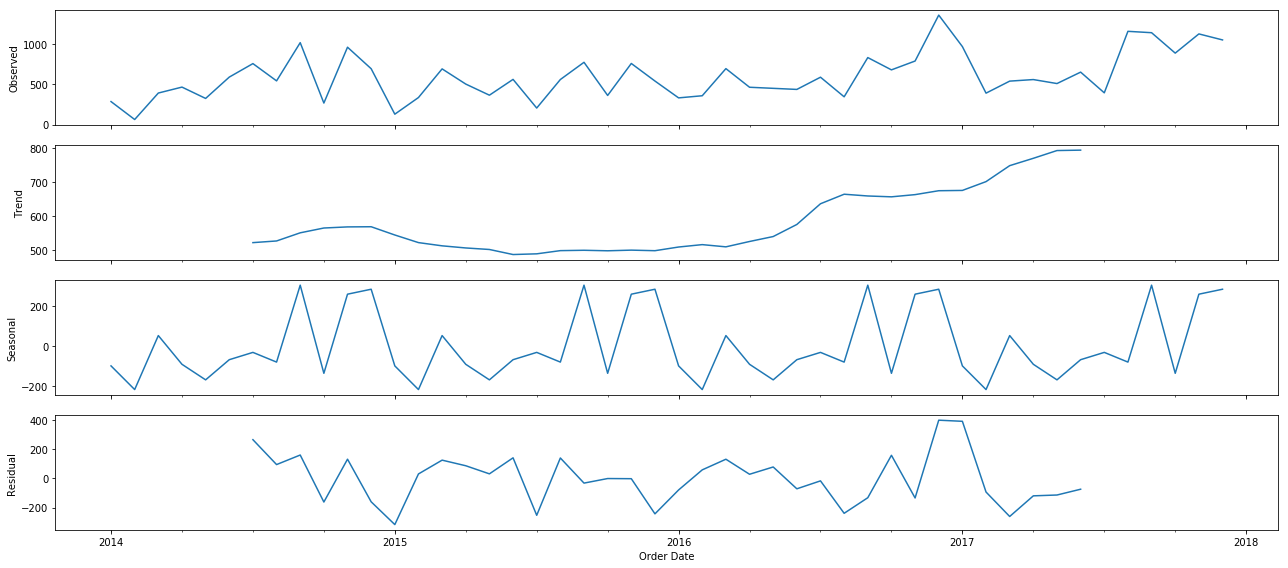

In [20]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(new_df, model='additive')
fig = decomposition.plot()
plt.show()